# Watershed Algorithm:

The watershed algorithm is an image segmentation technique to separate or "segment" different regions in an image based on intensity.

The concept of a "watershed" in geography (where water flows into different basins), the watershed algorithm treats pixel intensity levels like topographic elevations, effectively dividing regions in an image based on these intensity gradients.

Metaphorically, the watershed algorithm transformation treats the iamge it operates up on like a topographic map, with the brightness of each point representing its height and finds the lines that run along the tops of ridges.

Any grayscale image can be viewed as a topographical surface where high intensity denotes peaks and hiills while low intensity denotes valleys.

The algorithm then can fill every isolated valleys (local minima) with different colored water(labels).

As the "water"(intensity) rises, depending upono the peaks( gradients) nearby, "water" from different valleys( different segments of the image), with different colors could start to merge.

To avoid this merging, the algorithm creates barriers(segment edge boundaries ) in locations where "water" merges.

### This algorithm is especially useful for segmenting images into background and foreground in situatuons that are difficult  for other algorithms.
A common example is the use of coins next to each other on a table.

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [22]:
sep_coins = cv2.imread(r"C:\Users\JERRY\Downloads\Computer-Vision-with-Python\Computer-Vision-with-Python\DATA\pennies.jpg")

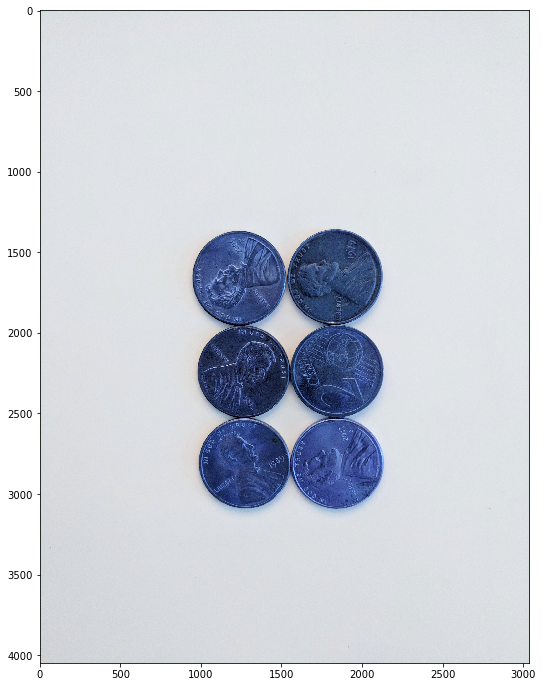

In [23]:
display(sep_coins)

As we can notice: for humans , its  easy to tell that there are 6 separated pennies are on the table, but lot of computer vision algortithm treats it like a single object and every thing else as a background.

## Our task is to separate these images into 7 different segments, 6 for the coins and 1 for the background.

In [24]:
## Lets first we use the methods that we learn so far to ssee the results which are not as such effective ...

In [25]:
#Median blu-- this would help us get rid off features that we dont really need, such as faces of the images,etc ( we only want to focus on the circle of these coins only)
#Gray scale
#Binary Threshold -- in order to make it B/W
#Find Contours

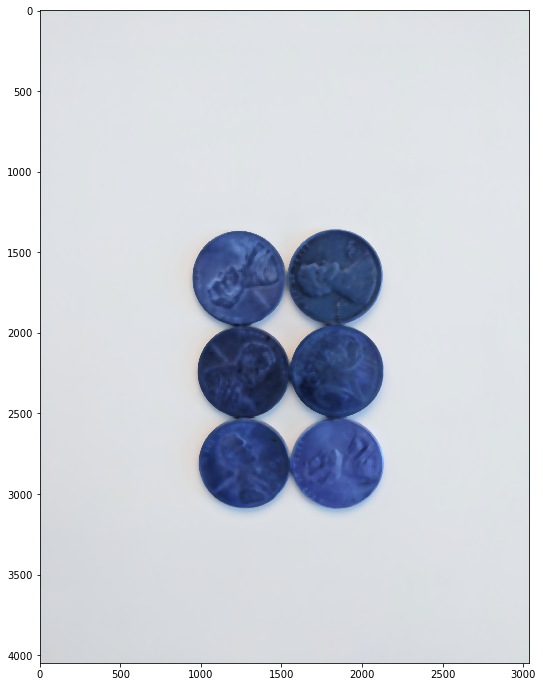

In [26]:
sep_blurr = cv2.medianBlur(sep_coins,25)
display(sep_blurr)

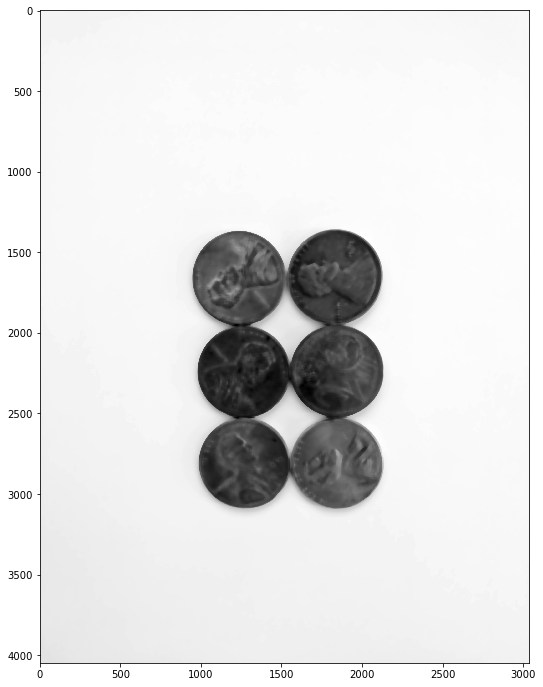

In [27]:
gray_sep_coins = cv2.cvtColor(sep_blurr,cv2.COLOR_BGR2GRAY)
display(gray_sep_coins,'gray')

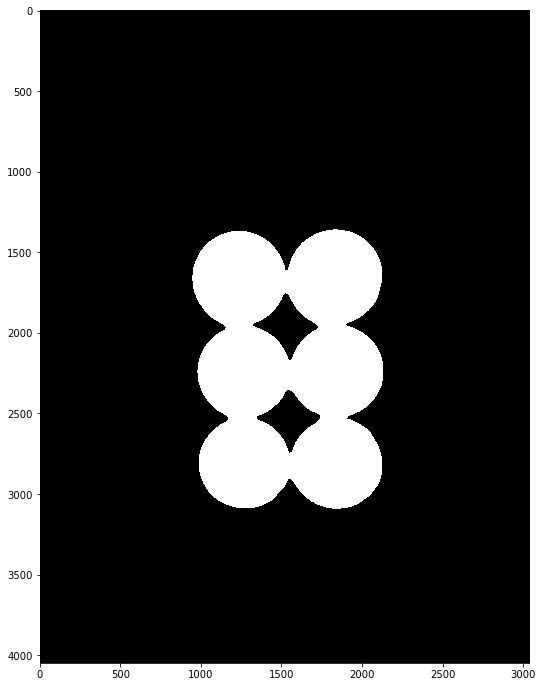

In [29]:
# Now we apply Binary threshold so that we can separte out the fore and background.
ret,sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)   #INV makes the foreground white.
display(sep_thresh,'gray')

In [33]:
# Contours:
image,contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

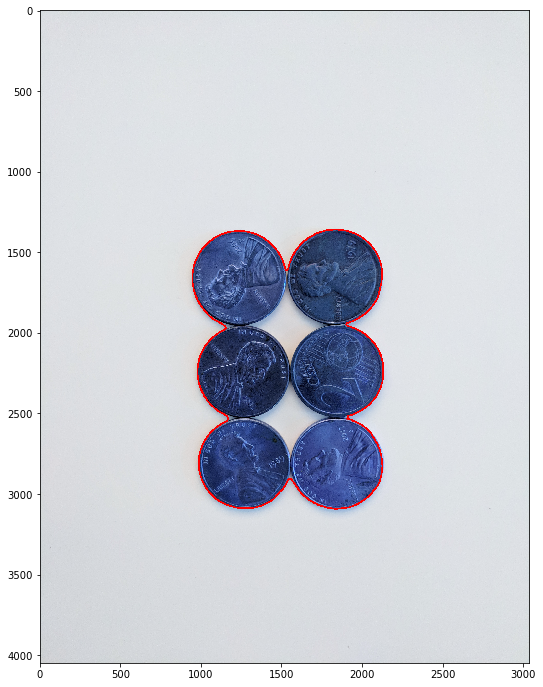

In [37]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:            
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)
display(sep_coins)

WE CAN SEE THE RESULTS THAT THE CONTOURS IT FOUND, IS THE ONE GIANT SIGLE OBJECT CONTOUR.

# Watershed Algorithm:

To actually find 6 distict pennies in the foreground versus the general background.

In [38]:
img = cv2.imread(r"C:\Users\JERRY\Downloads\Computer-Vision-with-Python\Computer-Vision-with-Python\DATA\pennies.jpg")

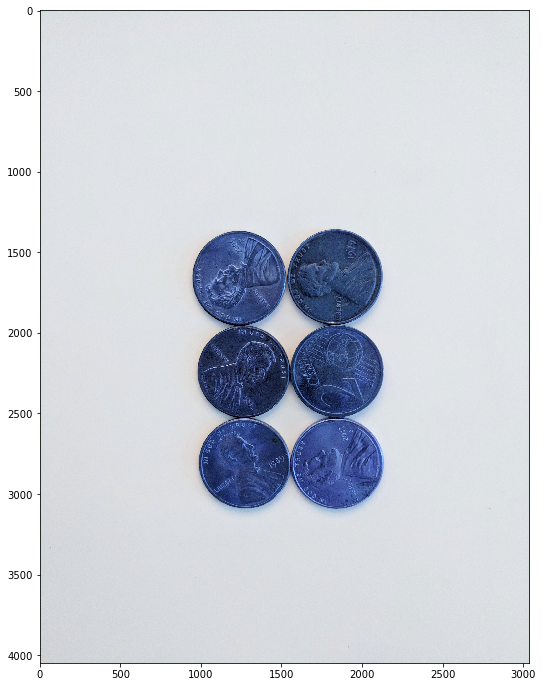

In [39]:
display(img)

In [40]:
# Blurr:  for the watershed algorithm , and a large image like this, apply stroung blurr (big ksize)
img = cv2.medianBlur(img,35)

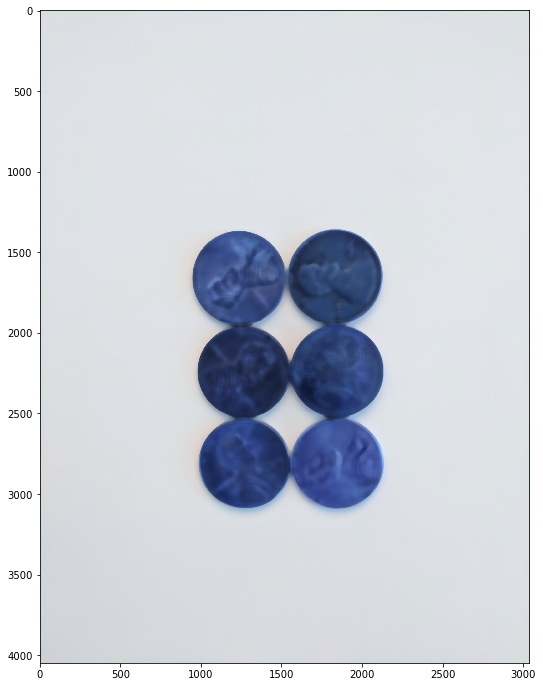

In [41]:
display(img)

In [42]:
# Applying Gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [46]:
# Applying threshold
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

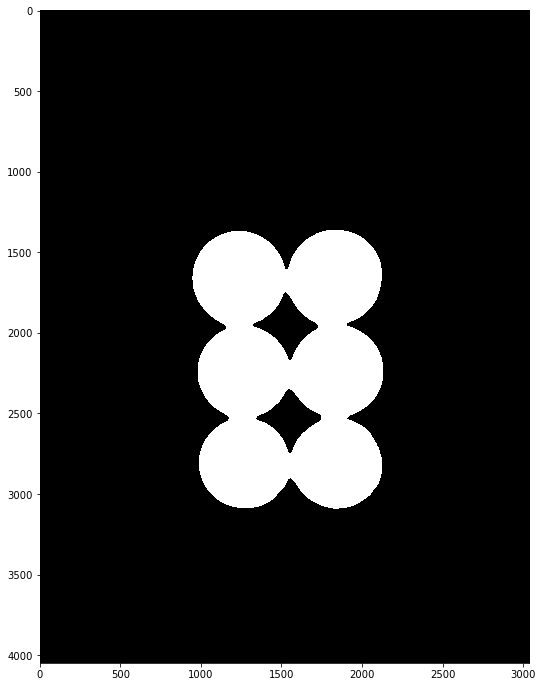

In [47]:
display(thresh,"gray")

Notice that we are getting some noise due to the feature of the pennies such as faces and imprints... but essentially not required, so we can avoid it by...

# Otsu's Method:
In computer vision and image processing, Otsu's method, named after Nobuyuki Otsu (大津展之, Ōtsu Nobuyuki), is used to perform automatic image thresholding

for that we apply the lower and upper threshold values in the thresholding...

In [50]:
# Applying threshold
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

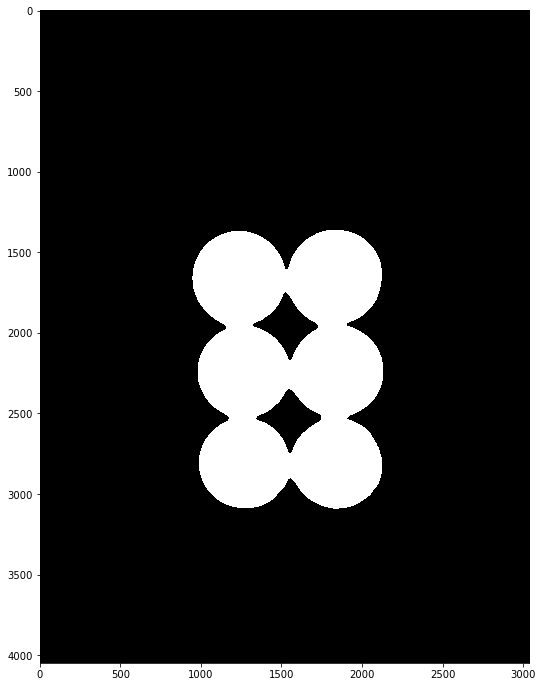

In [51]:
display(thresh,"gray")

Now we are getting  better version of a thresolded image. notice that they are still connected ,even after applying these much image processing methods... :( we still not be able to separte them.

Next step would be NOISE REMOVAL:

# noise removal:
doesnt make any difference for such simple image but for the more complex images , its kind of a necessary step , that is why we are doing it right now.

In [52]:
# Noise removal: (Optional)

In [54]:
kernel  = np.ones((3,3),dtype = np.uint8)

In [55]:
opening =cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)    # MORPH_OPEN a good way to reduce noise as we learned earlier.

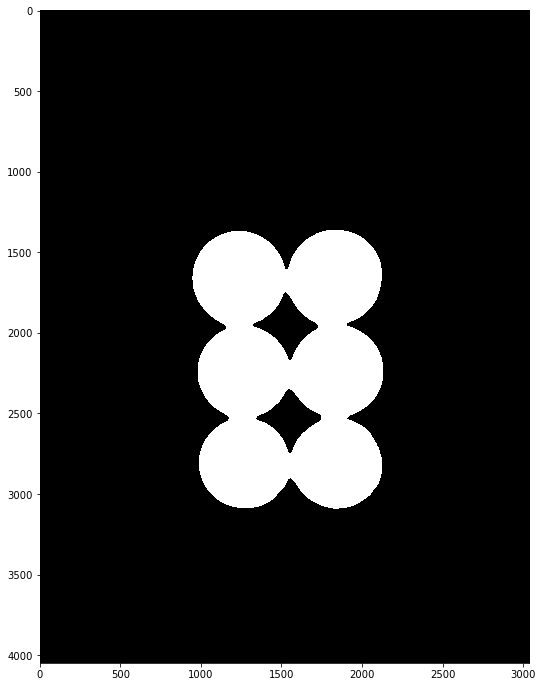

In [57]:
display(opening,'gray')

# Conclusion so far:

Notice we are still facing a fundamental problem here...coins themselves are touching each other in the image,
so even blurring, erosion, thresholding , morphological operations, noise removal, we are still having this issue.


For our watershed algorithm: we would set seeds that are in the foreground, in this case 6 seeds for each of this coins

### Distance transform: 
https://en.wikipedia.org/wiki/Distance_transform   visit this link for more information on this topic.

General idea is: in binary image we have 0 and 1, but when we apply distance transform,
those pixels which are far from the 0's, their number gets higher and higher ( they look brighter) .check out the visual representation in the link


we can apply this to our image to locate the centers( which would be the brightest since they are far from the 0's(black background we have, other than circle, every thing is 0)

In [58]:
dist_trasform = cv2.distanceTransform(opening,cv2.DIST_L2,5)    #cv2.DIST_L2,5)  default values

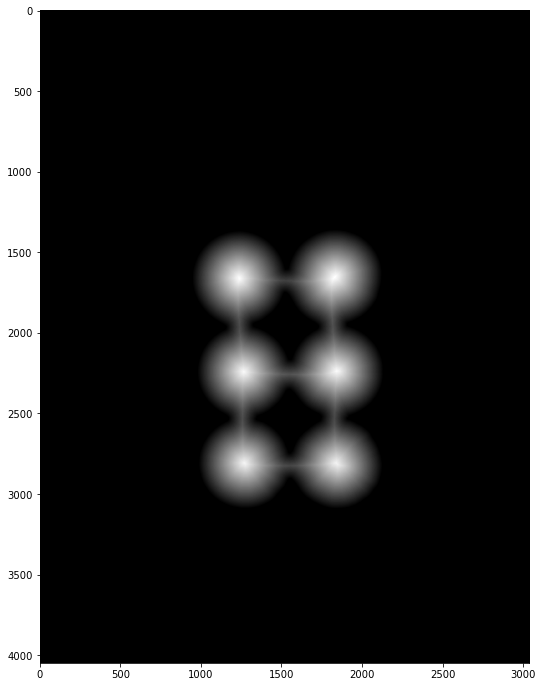

In [60]:
display(dist_trasform,'gray')

Now we have 6 very clear points which are our foreground, we would apply threshold to get those 6 dots. and then we would apply it to watershed algorithm and then it would understand that those are the 6 segments we are looking into

In [68]:
ret,sure_fg = cv2.threshold(dist_trasform,0.7*dist_trasform.max(),255,0)

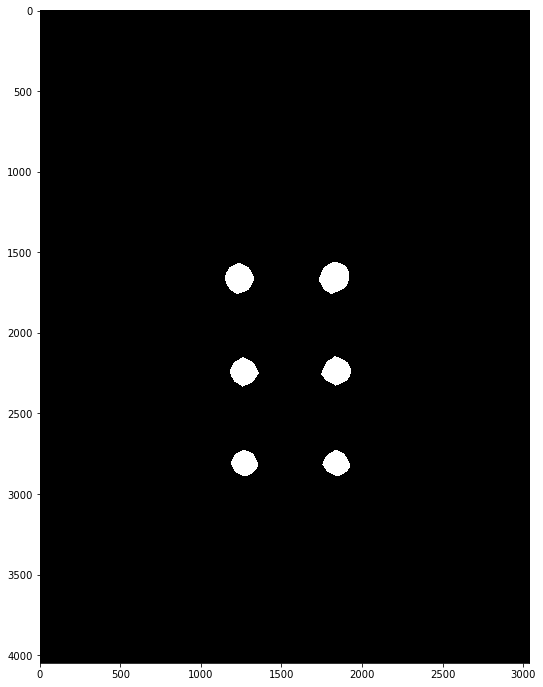

In [69]:
display(opening,'gray')  # and these 6 points we are sure that they are happen to be in the foregorund.

if we compare it with the distance transform image, apart from the dots we got, we are missing the actual white circles around those white dots are actually now the unknown regions, thats what we want our watershed algorithm to figure out.

lets display and find the unknown region.

In [70]:
sure_fg = np.uint8(sure_fg)

In [71]:
unknown = cv2.subtract(opening,sure_fg)   # refer the provided lecture notebook

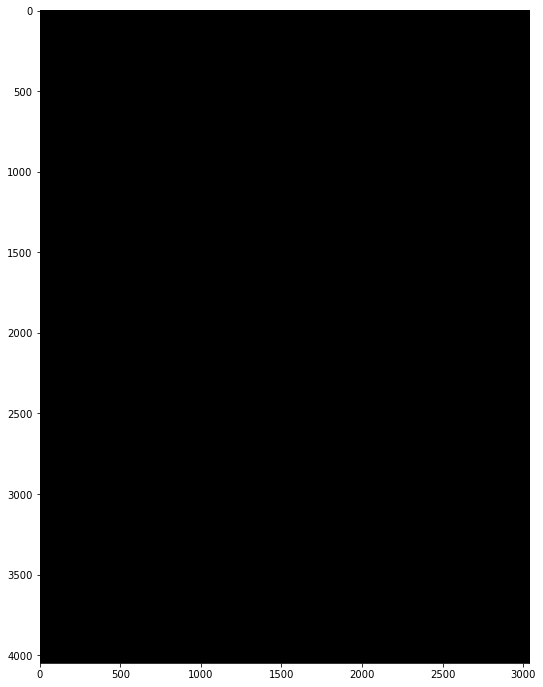

In [73]:
display(unknown,'gray')